In [1]:
import os
os.chdir('C:\\Users\\R Sriaravindh\\Documents')

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score,confusion_matrix
from IPython.display import Image
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
import time
import seaborn as sns

In [4]:
df=pd.read_csv('C:\\Users\\R Sriaravindh\\Documents\\Pulsar.csv')
x=df.drop('class',axis=1)
y=df['class']

# Data exploration

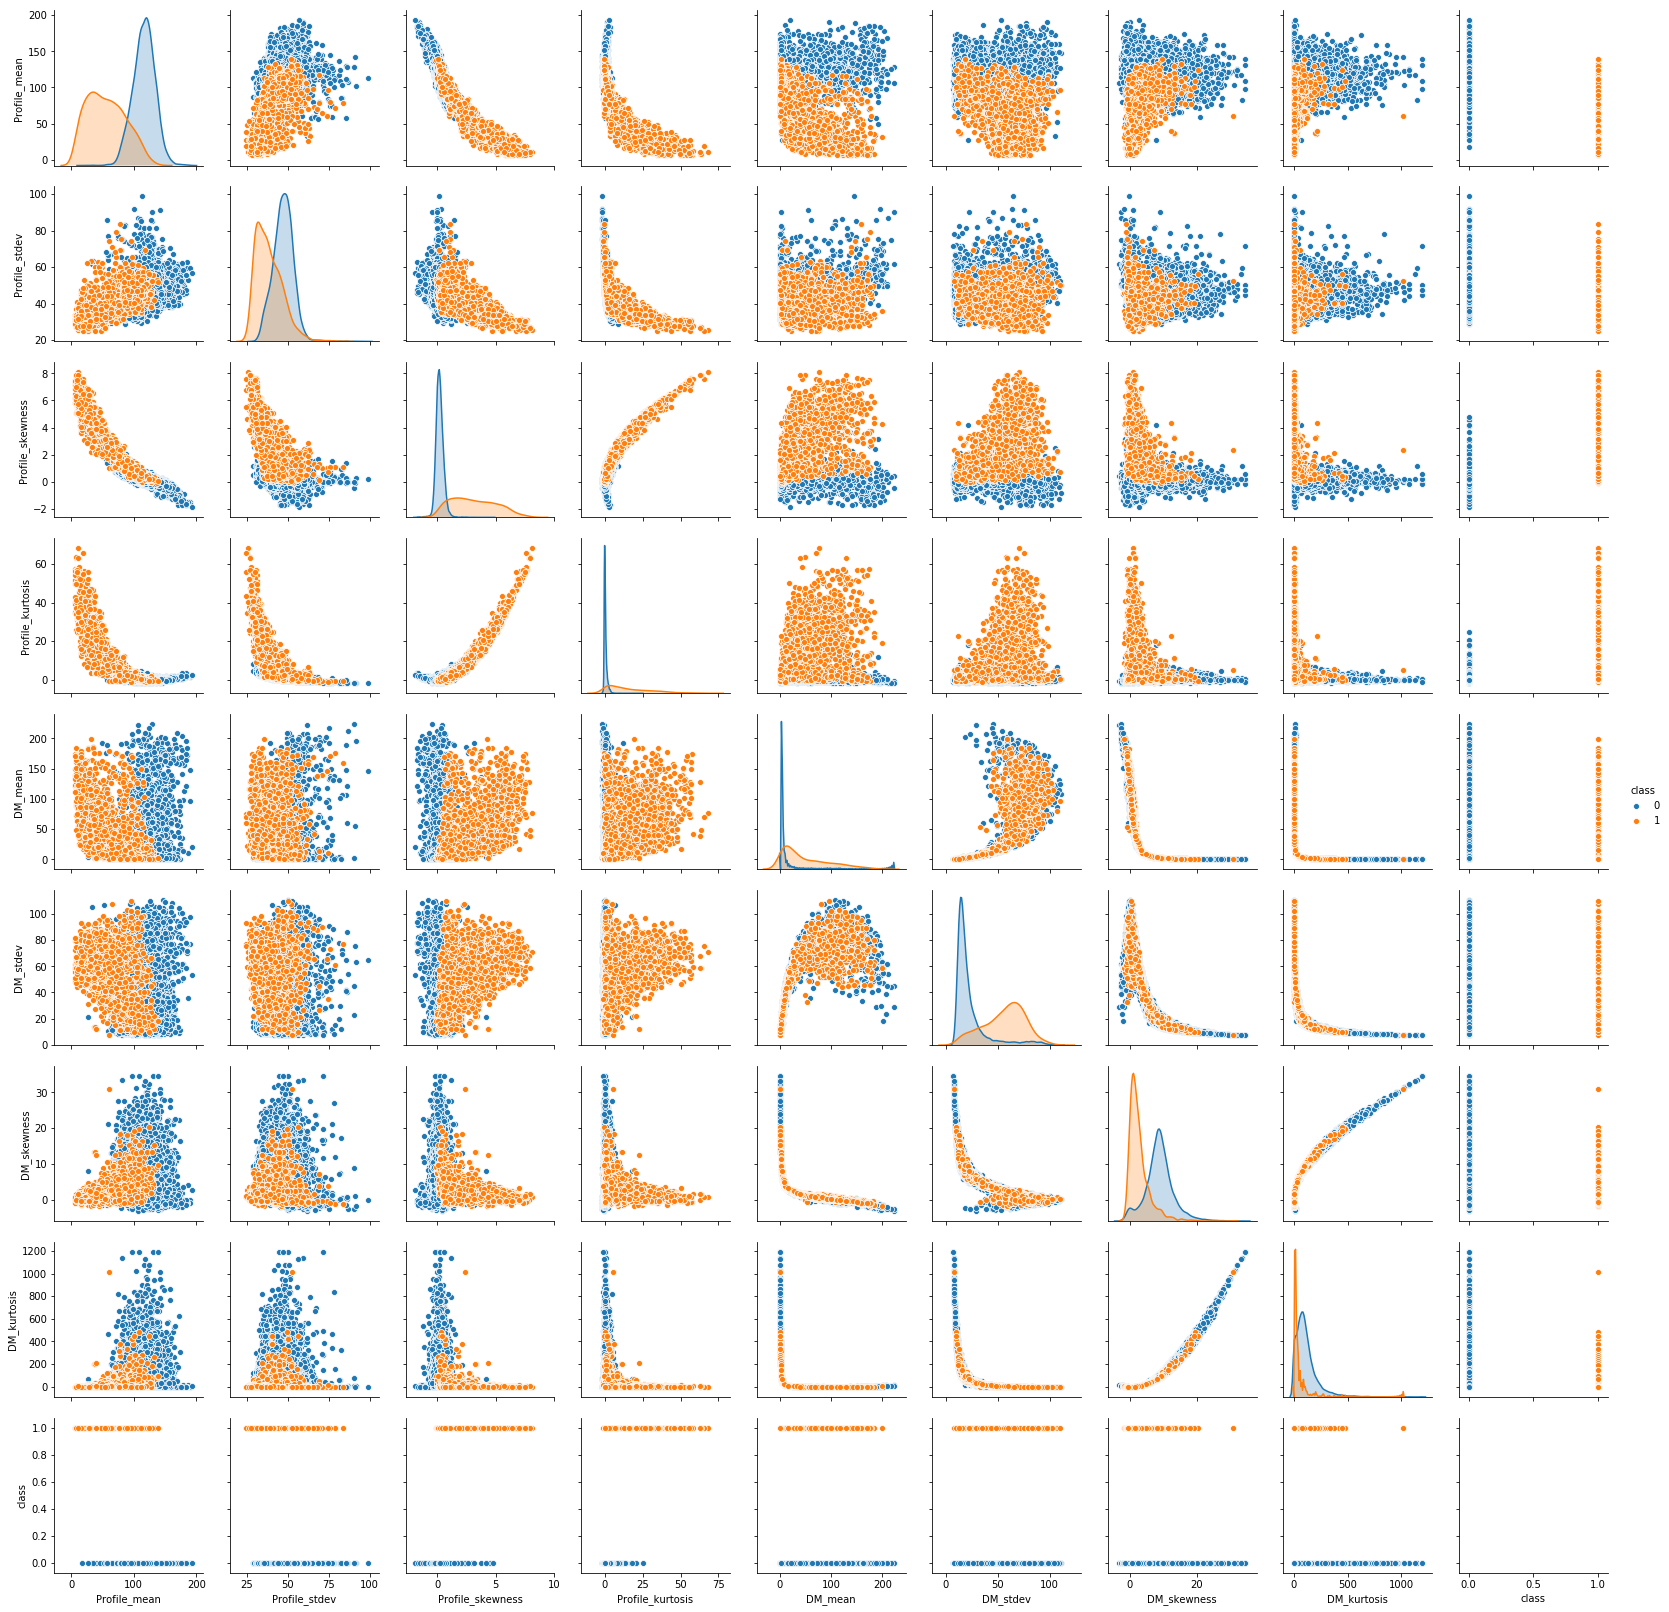

In [5]:
sns.pairplot(df,hue='class')

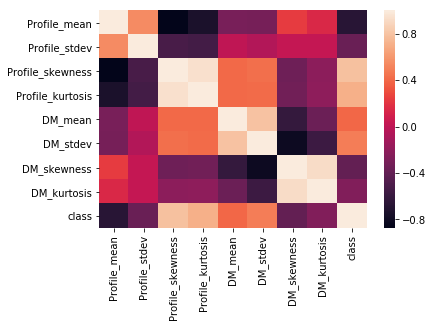

In [6]:
sns.heatmap(df.corr())

In [7]:
df.describe()

,Profile_mean,Profile_stdev,Profile_skewness,Profile_kurtosis,DM_mean,DM_stdev,DM_skewness,DM_kurtosis,class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309331,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
Profile_mean        17898 non-null float64
Profile_stdev       17898 non-null float64
Profile_skewness    17898 non-null float64
Profile_kurtosis    17898 non-null float64
DM_mean             17898 non-null float64
DM_stdev            17898 non-null float64
DM_skewness         17898 non-null float64
DM_kurtosis         17898 non-null float64
class               17898 non-null int64
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


# Base models

# Logistic regression model

In [9]:
results_df=pd.DataFrame(columns=['Algorithm','Train_time','Test_time','TP','FP','FN','TN','Accuracy_initial'])

In [10]:
lr=LogisticRegression()
train_time_start=time.clock()
model_lr=lr.fit(x,y)
train_time_elapsed = (time.clock() - train_time_start)
test_time_start=time.clock()
y_pred_lr=model_lr.predict(x)
test_time_elapsed = (time.clock() - test_time_start)
print ('Accuracy score for Log Reg model', accuracy_score(y,y_pred_lr)*100)

Accuracy score for Log Reg model 97.90479383171305


In [11]:
cm_lr=confusion_matrix(y,y_pred_lr)
TPR_lr=100*cm_lr[1,1]/sum(cm_lr[1,:])
print('Sensitivity for Log Reg model ', TPR_lr)

Sensitivity for Log Reg model  82.36729713239781


In [12]:
tp,fp,fn,tn=cm_lr.ravel()

In [13]:
results_df=results_df.append(pd.DataFrame({'Algorithm':'Logistic_regression','Train_time':train_time_elapsed,
                                          'Test_time':test_time_elapsed,'TP':[tp],'FP':fp,'FN':fn,'TN':tn,
                                           'Accuracy_initial':accuracy_score(y,y_pred_lr)*100}))

In [14]:
results_df

,Algorithm,Train_time,Test_time,TP,FP,FN,TN,Accuracy_initial
0,Logistic_regression,0.078076,0.001717,16173,86,289,1350,97.904794


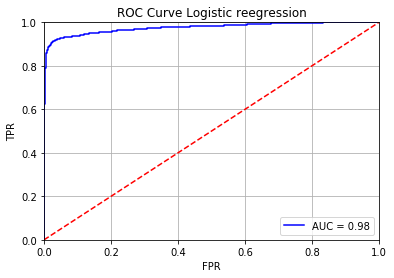

In [15]:
y_scores=lr.predict_proba(x)
fpr, tpr, threshold = roc_curve(y, y_scores[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.title('ROC Curve Logistic reegression')
plt.grid()
plt.show()

# KNN model

In [16]:
neigh=KNeighborsClassifier()
train_time_start=time.clock()
model_knn=neigh.fit(x,y)
train_time_elapsed = (time.clock() - train_time_start)
test_time_start=time.clock()
y_pred_knn=model_knn.predict(x)
test_time_elapsed = (time.clock() - test_time_start)
print ('Accuracy score for KNN model', accuracy_score(y,y_pred_knn)*100)

Accuracy score for KNN model 97.8153983685328


In [17]:
cm_knn=confusion_matrix(y,y_pred_knn)
TPR_knn=100*cm_knn[1,1]/sum(cm_knn[1,:])
print('Sensitivity for Log Reg model ', TPR_knn)

Sensitivity for Log Reg model  82.06223306894448


In [18]:
parameter={'n_neighbors':np.arange(1,50),'weights':['uniform','distance']}
GS=GridSearchCV(model_knn,parameter,cv=5,scoring='recall')
GS.fit(x,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]), 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

In [19]:
GS.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

In [20]:
neigh=KNeighborsClassifier(n_neighbors=4,weights='distance',metric='euclidean')
train_time_start=time.clock()
model_knn=neigh.fit(x,y)
train_time_elapsed = (time.clock() - train_time_start)
test_time_start=time.clock()
y_pred_knn=model_knn.predict(x)
test_time_elapsed = (time.clock() - test_time_start)
print ('Accuracy score for KNN model', accuracy_score(y,y_pred_knn)*100)

Accuracy score for KNN model 100.0


In [21]:
cm_knn=confusion_matrix(y,y_pred_knn)
TPR_knn=100*cm_knn[1,1]/sum(cm_knn[1,:])
print('Sensitivity for Log Reg model ', TPR_knn)

Sensitivity for Log Reg model  100.0


In [22]:
tp,fp,fn,tn=cm_knn.ravel()

In [84]:
cm_knn

array([[16259,     0],
       [    0,  1639]], dtype=int64)

In [23]:
results_df=results_df.append(pd.DataFrame({'Algorithm':'KNN','Train_time':train_time_elapsed,
                                          'Test_time':test_time_elapsed,'TP':[tp],'FP':fp,'FN':fn,'TN':tn,
                                           'Accuracy_initial':accuracy_score(y,y_pred_knn)*100}))
results_df

,Algorithm,Train_time,Test_time,TP,FP,FN,TN,Accuracy_initial
0,Logistic_regression,0.078076,0.001717,16173,86,289,1350,97.904794
0,KNN,0.016884,0.172204,16259,0,0,1639,100.000000


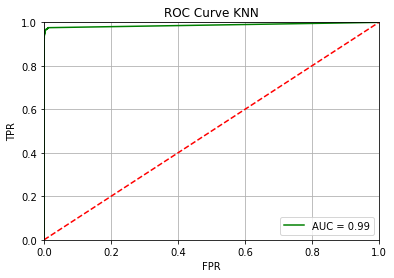

In [85]:
y_scores=neigh.predict_proba(x)
fpr, tpr, threshold = roc_curve(y, y_scores[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, 'g', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.title('ROC Curve KNN')
plt.grid()
plt.show()

# Naive bayes model

In [25]:
nb=GaussianNB()
train_time_start=time.clock()
model_nb=nb.fit(x,y)
train_time_elapsed = (time.clock() - train_time_start)
test_time_start=time.clock()
y_pred_nb=model_nb.predict(x)
test_time_elapsed = (time.clock() - test_time_start)
print ('Accuracy score for Naive Bayes model', accuracy_score(y,y_pred_nb)*100)
cm_nb=confusion_matrix(y,y_pred_nb)
TPR_nb=100*cm_nb[1,1]/sum(cm_nb[1,:])
print('Sensitivity for Log Reg model ', TPR_nb)       

Accuracy score for Naive Bayes model 94.52452788021007
Sensitivity for Log Reg model  84.8078096400244


In [26]:
tp,fp,fn,tn=cm_nb.ravel()

In [27]:
results_df=results_df.append(pd.DataFrame({'Algorithm':'Naive_bayes','Train_time':train_time_elapsed,
                                          'Test_time':test_time_elapsed,'TP':[tp],'FP':fp,'FN':fn,'TN':tn,
                                           'Accuracy_initial':accuracy_score(y,y_pred_nb)*100}))
results_df

,Algorithm,Train_time,Test_time,TP,FP,FN,TN,Accuracy_initial
0,Logistic_regression,0.078076,0.001717,16173,86,289,1350,97.904794
0,KNN,0.016884,0.172204,16259,0,0,1639,100.000000
0,Naive_bayes,0.007273,0.004705,15528,731,249,1390,94.524528


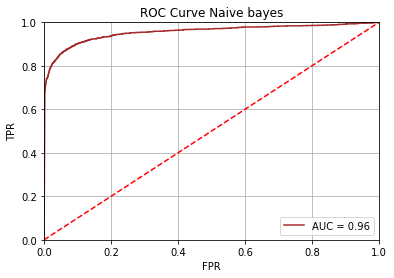

In [28]:
y_scores=nb.predict_proba(x)
fpr, tpr, threshold = roc_curve(y, y_scores[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, 'brown', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.title('ROC Curve Naive bayes')
plt.grid()
plt.show()

# Decision Tree

In [29]:
dt=DecisionTreeClassifier(random_state=0)
train_time_start=time.clock()

model_dt=dt.fit(x,y)
train_time_elapsed = (time.clock() - train_time_start)
test_time_start=time.clock()
test_time_elapsed = (time.clock() - test_time_start)

y_pred_dt=model_dt.predict(x)
print ('Accuracy score for fully grown DT model', accuracy_score(y,y_pred_dt)*100)
cm_dt=confusion_matrix(y,y_pred_dt)
TPR_dt=100*cm_dt[1,1]/sum(cm_dt[1,:])
print('Sensitivity for Log Reg model ', TPR_dt) 

Accuracy score for fully grown DT model 100.0
Sensitivity for Log Reg model  100.0


In [30]:
parameter={'max_depth':np.arange(1,50),'criterion':['entropy','gini']}
GS=GridSearchCV(model_dt,parameter,cv=5,scoring='recall')
GS.fit(x,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]), 'criterion': ['entropy', 'gini']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

In [31]:
GS.best_params_

{'criterion': 'entropy', 'max_depth': 5}

In [32]:
dt=DecisionTreeClassifier(criterion='gini',max_depth=5,random_state=0)
train_time_start=time.clock()
model_dt=dt.fit(x,y)
train_time_elapsed = (time.clock() - train_time_start)
test_time_start=time.clock()
y_pred_dt=model_dt.predict(x)
test_time_elapsed = (time.clock() - test_time_start)
print ('Accuracy score for fully grown DT model', accuracy_score(y,y_pred_dt)*100)
cm_dt=confusion_matrix(y,y_pred_dt)
TPR_dt=100*cm_dt[1,1]/sum(cm_dt[1,:])
print('Sensitivity for Log Reg model ', TPR_dt) 

Accuracy score for fully grown DT model 98.20650351994637
Sensitivity for Log Reg model  84.50274557657109


In [33]:
tp,fp,fn,tn=cm_dt.ravel()
results_df=results_df.append(pd.DataFrame({'Algorithm':'Decision_tree','Train_time':train_time_elapsed,
                                          'Test_time':test_time_elapsed,'TP':[tp],'FP':fp,'FN':fn,'TN':tn,
                                           'Accuracy_initial':accuracy_score(y,y_pred_dt)*100}))
results_df

,Algorithm,Train_time,Test_time,TP,FP,FN,TN,Accuracy_initial
0,Logistic_regression,0.078076,0.001717,16173,86,289,1350,97.904794
0,KNN,0.016884,0.172204,16259,0,0,1639,100.000000
0,Naive_bayes,0.007273,0.004705,15528,731,249,1390,94.524528
0,Decision_tree,0.126298,0.001854,16192,67,254,1385,98.206504


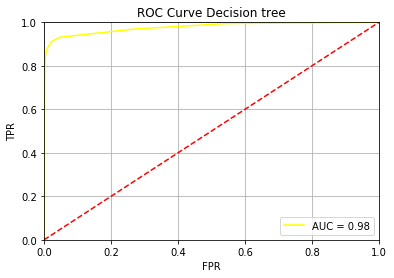

In [34]:
y_scores=dt.predict_proba(x)
fpr, tpr, threshold = roc_curve(y, y_scores[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, 'yellow', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.title('ROC Curve Decision tree')
plt.grid()
plt.show()

# Random forest

In [35]:
rf=RandomForestClassifier(n_estimators=17,criterion='entropy',random_state=0)
model_rf=rf.fit(x,y)
y_pred_rf=model_rf.predict(x)
print ('Accuracy score for RF model', accuracy_score(y,y_pred_rf)*100)
cm_rf=confusion_matrix(y,y_pred_rf)
TPR_rf=100*cm_rf[1,1]/sum(cm_rf[1,:])
print('Sensitivity for Log Reg model ', TPR_rf) 

Accuracy score for RF model 99.87708123812716
Sensitivity for Log Reg model  98.9627821842587


In [36]:
parameter={'n_estimators':np.arange(1,50),'criterion':['entropy','gini']}
GS=GridSearchCV(model_rf,parameter,cv=5,scoring='recall')
GS.fit(x,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=17, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]), 'criterion': ['entropy', 'gini']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

In [37]:
GS.best_params_

{'criterion': 'gini', 'n_estimators': 11}

In [38]:
rf=RandomForestClassifier(n_estimators=11,criterion='gini',random_state=0)
train_time_start=time.clock()
model_rf=rf.fit(x,y)
train_time_elapsed = (time.clock() - train_time_start)
test_time_start=time.clock()
y_pred_rf=model_rf.predict(x)
test_time_elapsed = (time.clock() - test_time_start)
print ('Accuracy score for RF model', accuracy_score(y,y_pred_rf)*100)
cm_rf=confusion_matrix(y,y_pred_rf)
TPR_rf=100*cm_rf[1,1]/sum(cm_rf[1,:])
print('Sensitivity for Log Reg model ', TPR_rf) 

Accuracy score for RF model 99.79327299139568
Sensitivity for Log Reg model  98.29164124466138


In [39]:
tp,fp,fn,tn=cm_dt.ravel()
results_df=results_df.append(pd.DataFrame({'Algorithm':'Random_forest','Train_time':train_time_elapsed,
                                          'Test_time':test_time_elapsed,'TP':[tp],'FP':fp,'FN':fn,'TN':tn,
                                           'Accuracy_initial':accuracy_score(y,y_pred_rf)*100}))
results_df

,Algorithm,Train_time,Test_time,TP,FP,FN,TN,Accuracy_initial
0,Logistic_regression,0.078076,0.001717,16173,86,289,1350,97.904794
0,KNN,0.016884,0.172204,16259,0,0,1639,100.000000
0,Naive_bayes,0.007273,0.004705,15528,731,249,1390,94.524528
0,Decision_tree,0.126298,0.001854,16192,67,254,1385,98.206504
0,Random_forest,0.412672,0.031005,16192,67,254,1385,99.793273


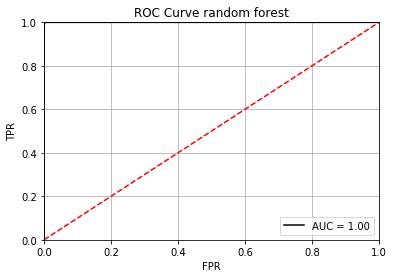

In [40]:
y_scores=rf.predict_proba(x)
fpr, tpr, threshold = roc_curve(y, y_scores[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, 'black', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.title('ROC Curve random forest')
plt.grid()
plt.show()

# Bagged models

In [41]:
from sklearn.ensemble import BaggingClassifier

# Bagged KNN

Bagging not required for KNN it already shows 100% accuracy let us go with cross validation at the end

# Bagged Naive bayes

In [42]:
bgcl_nb=BaggingClassifier(base_estimator=model_nb,n_estimators=5,random_state=0)
model_bagged_nb=bgcl_nb.fit(x,y)
y_pred_nb_bagged=model_bagged_nb.predict(x)
print ('Accuracy score for Naive Bayes model', accuracy_score(y,y_pred_nb_bagged)*100)
cm_nb_bagged=confusion_matrix(y,y_pred_nb_bagged)
cm_nb_bagged

Accuracy score for Naive Bayes model 94.53011509665885


array([[15528,   731],
       [  248,  1391]], dtype=int64)

In [43]:
parameter={'n_estimators':np.arange(1,10)}
GS=GridSearchCV(bgcl_nb,parameter,cv=5,scoring='recall')
GS.fit(x,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=BaggingClassifier(base_estimator=GaussianNB(priors=None, var_smoothing=1e-09),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=5, n_jobs=None, oob_score=False,
         random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

In [44]:
GS.best_params_

{'n_estimators': 2}

In [45]:
bgcl_nb=BaggingClassifier(base_estimator=model_nb,n_estimators=2,random_state=0)
train_time_start=time.clock()

model_bagged_nb=bgcl_nb.fit(x,y)
train_time_elapsed = (time.clock() - train_time_start)
test_time_start=time.clock()
y_pred_nb_bagged=model_bagged_nb.predict(x)
test_time_elapsed = (time.clock() - test_time_start)

print ('Accuracy score for Naive Bayes model', accuracy_score(y,y_pred_nb_bagged)*100)
cm_nb_bagged=confusion_matrix(y,y_pred_nb_bagged)
cm_nb_bagged

Accuracy score for Naive Bayes model 94.47983014861995


array([[15522,   737],
       [  251,  1388]], dtype=int64)

In [46]:
tp,fp,fn,tn=cm_nb_bagged.ravel()
results_df=results_df.append(pd.DataFrame({'Algorithm':'Bagged_NB','Train_time':train_time_elapsed,
                                          'Test_time':test_time_elapsed,'TP':[tp],'FP':fp,'FN':fn,'TN':tn,
                                           'Accuracy_initial':accuracy_score(y,y_pred_nb_bagged)*100}))
results_df

,Algorithm,Train_time,Test_time,TP,FP,FN,TN,Accuracy_initial
0,Logistic_regression,0.078076,0.001717,16173,86,289,1350,97.904794
0,KNN,0.016884,0.172204,16259,0,0,1639,100.000000
0,Naive_bayes,0.007273,0.004705,15528,731,249,1390,94.524528
0,Decision_tree,0.126298,0.001854,16192,67,254,1385,98.206504
0,Random_forest,0.412672,0.031005,16192,67,254,1385,99.793273
0,Bagged_NB,0.022475,0.020942,15522,737,251,1388,94.479830


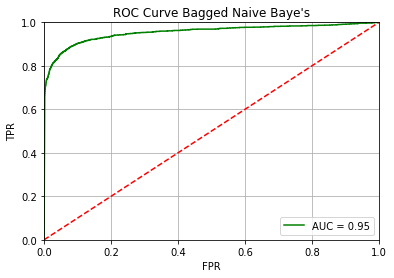

In [47]:
y_scores=bgcl_nb.predict_proba(x)
fpr, tpr, threshold = roc_curve(y, y_scores[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, 'g', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.title('ROC Curve Bagged Naive Baye\'s')
plt.grid()
plt.show()

# Bagged Logistic regression

In [48]:
bgcl_lr=BaggingClassifier(base_estimator=model_lr,n_estimators=13,random_state=0)
train_time_start=time.clock()

model_bagged_lr=bgcl_lr.fit(x,y)
y_pred_lr_bagged=model_bagged_lr.predict(x)
y_pred_nb_bagged=model_bagged_nb.predict(x)
test_time_elapsed = (time.clock() - test_time_start)

print ('Accuracy score for Log Reg model', accuracy_score(y,y_pred_lr_bagged)*100)
cm_lr_bagged=confusion_matrix(y,y_pred_lr_bagged)
cm_lr_bagged

Accuracy score for Log Reg model 97.89920661526428


array([[16171,    88],
       [  288,  1351]], dtype=int64)

In [49]:
parameter={'n_estimators':np.arange(1,10)}
GS=GridSearchCV(bgcl_lr,parameter,cv=5,scoring='recall')
GS.fit(x,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=BaggingClassifier(base_estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=...n_estimators=13, n_jobs=None, oob_score=False,
         random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

In [50]:
GS.best_params_

{'n_estimators': 9}

In [51]:
bgcl_lr=BaggingClassifier(base_estimator=model_lr,n_estimators=9,random_state=0)
train_time_start=time.clock()

model_bagged_lr=bgcl_lr.fit(x,y)

train_time_elapsed = (time.clock() - train_time_start)
test_time_start=time.clock()

y_pred_nb_bagged=model_bagged_nb.predict(x)
test_time_elapsed = (time.clock() - test_time_start)
print ('Accuracy score for Log Reg model', accuracy_score(y,y_pred_lr_bagged)*100)
cm_lr_bagged=confusion_matrix(y,y_pred_lr_bagged)
cm_lr_bagged

Accuracy score for Log Reg model 97.89920661526428


array([[16171,    88],
       [  288,  1351]], dtype=int64)

In [52]:
tp,fp,fn,tn=cm_lr_bagged.ravel()
results_df=results_df.append(pd.DataFrame({'Algorithm':'Bagged_LR','Train_time':train_time_elapsed,
                                          'Test_time':test_time_elapsed,'TP':[tp],'FP':fp,'FN':fn,'TN':tn,
                                           'Accuracy_initial':accuracy_score(y,y_pred_lr_bagged)*100}))
results_df

,Algorithm,Train_time,Test_time,TP,FP,FN,TN,Accuracy_initial
0,Logistic_regression,0.078076,0.001717,16173,86,289,1350,97.904794
0,KNN,0.016884,0.172204,16259,0,0,1639,100.000000
0,Naive_bayes,0.007273,0.004705,15528,731,249,1390,94.524528
0,Decision_tree,0.126298,0.001854,16192,67,254,1385,98.206504
0,Random_forest,0.412672,0.031005,16192,67,254,1385,99.793273
0,Bagged_NB,0.022475,0.020942,15522,737,251,1388,94.479830
0,Bagged_LR,1.112256,0.012086,16171,88,288,1351,97.899207


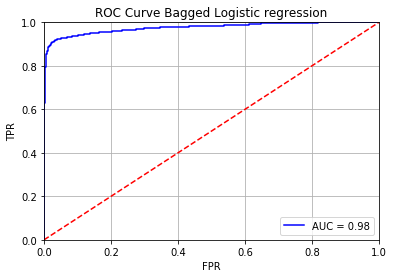

In [53]:
y_scores=bgcl_lr.predict_proba(x)
fpr, tpr, threshold = roc_curve(y, y_scores[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, 'blue', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.title('ROC Curve Bagged Logistic regression')
plt.grid()
plt.show()

# Bagged DT

In [54]:
bgcl_dt=BaggingClassifier(base_estimator=model_dt,n_estimators=13,random_state=0)
model_bagged_dt=bgcl_dt.fit(x,y)
y_pred_dt_bagged=model_bagged_dt.predict(x)
print ('Accuracy score for Log Reg model', accuracy_score(y,y_pred_dt_bagged)*100)
cm_dt_bagged=confusion_matrix(y,y_pred_dt_bagged)
cm_dt_bagged

Accuracy score for Log Reg model 98.26796290088278


array([[16182,    77],
       [  233,  1406]], dtype=int64)

In [55]:
parameter={'n_estimators':np.arange(1,10)}
GS=GridSearchCV(bgcl_dt,parameter,cv=5,scoring='recall')
GS.fit(x,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min...n_estimators=13, n_jobs=None, oob_score=False,
         random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

In [56]:
GS.best_params_

{'n_estimators': 1}

In [57]:
bgcl_dt=BaggingClassifier(base_estimator=model_dt,n_estimators=1,random_state=0)
train_time_start=time.clock()

model_bagged_dt=bgcl_dt.fit(x,y)
train_time_elapsed = (time.clock() - train_time_start)
test_time_start=time.clock()

y_pred_dt_bagged=model_bagged_dt.predict(x)
test_time_elapsed = (time.clock() - test_time_start)

print ('Accuracy score for Log Reg model', accuracy_score(y,y_pred_dt_bagged)*100)
cm_dt_bagged=confusion_matrix(y,y_pred_dt_bagged)
cm_dt_bagged

Accuracy score for Log Reg model 98.13386970611242


array([[16162,    97],
       [  237,  1402]], dtype=int64)

In [58]:
tp,fp,fn,tn=cm_dt_bagged.ravel()
results_df=results_df.append(pd.DataFrame({'Algorithm':'Bagged_DT','Train_time':train_time_elapsed,
                                          'Test_time':test_time_elapsed,'TP':[tp],'FP':fp,'FN':fn,'TN':tn,
                                           'Accuracy_initial':accuracy_score(y,y_pred_dt_bagged)*100}))
results_df

,Algorithm,Train_time,Test_time,TP,FP,FN,TN,Accuracy_initial
0,Logistic_regression,0.078076,0.001717,16173,86,289,1350,97.904794
0,KNN,0.016884,0.172204,16259,0,0,1639,100.000000
0,Naive_bayes,0.007273,0.004705,15528,731,249,1390,94.524528
0,Decision_tree,0.126298,0.001854,16192,67,254,1385,98.206504
0,Random_forest,0.412672,0.031005,16192,67,254,1385,99.793273
0,Bagged_NB,0.022475,0.020942,15522,737,251,1388,94.479830
0,Bagged_LR,1.112256,0.012086,16171,88,288,1351,97.899207
0,Bagged_DT,0.082798,0.003647,16162,97,237,1402,98.133870


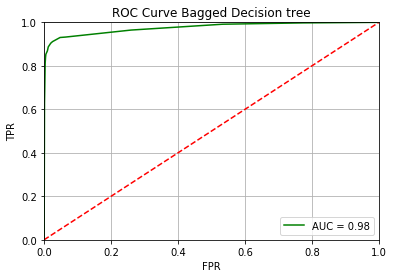

In [59]:
y_scores=bgcl_dt.predict_proba(x)
fpr, tpr, threshold = roc_curve(y, y_scores[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, 'green', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.title('ROC Curve Bagged Decision tree')
plt.grid()
plt.show()

# model comparison

In [60]:
models=[]
models.append(('Base_lr',model_lr))
models.append(('Bagged_lr',bgcl_lr))
models.append(('Base_knn',model_knn))
models.append(('Base_nb',model_nb))
models.append(('Bagged_nb',bgcl_nb))
models.append(('Base_dt',model_dt))
models.append(('Bagged_dt',bgcl_dt))

models.append(('RF',model_rf))
models

[('Base_lr',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='warn',
            n_jobs=None, penalty='l2', random_state=None, solver='warn',
            tol=0.0001, verbose=0, warm_start=False)),
 ('Bagged_lr',
  BaggingClassifier(base_estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='warn',
            n_jobs=None, penalty='l2', random_state=None, solver='warn',
            tol=0.0001, verbose=0, warm_start=False),
           bootstrap=True, bootstrap_features=False, max_features=1.0,
           max_samples=1.0, n_estimators=9, n_jobs=None, oob_score=False,
           random_state=0, verbose=0, warm_start=False)),
 ('Base_knn',
  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
             metric_params=None, n_jobs=None, n_neighbors=4, p=2,
             weights='distance')),

### Recall based validation

Base_lr: 0.797061 (0.003935)
Bagged_lr: 0.791576 (0.004723)
Base_knn: 0.766149 (0.002808)
Base_nb: 0.848326 (0.001038)
Bagged_nb: 0.847003 (0.001136)
Base_dt: 0.824795 (0.003245)
Bagged_dt: 0.813274 (0.006373)
RF: 0.800293 (0.008526)


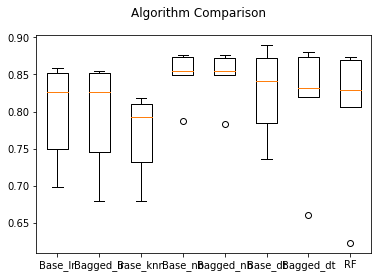

In [87]:
from sklearn.model_selection import KFold,cross_val_score
from sklearn import model_selection
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=5,random_state=2)
    cv_results = model_selection.cross_val_score(model, x, y, cv=kfold,scoring='recall')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.var())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### AUC validation

In [62]:
from sklearn.model_selection import KFold,cross_val_score
from sklearn import model_selection
from sklearn.metrics import roc_curve,auc
kf=KFold(n_splits=5,shuffle=True,random_state=2)
for name, model in models:
    roc_auc=[]
    for train,test in kf.split(x,y):
        xtrain,xtest=x.iloc[train,:],x.iloc[test,:]
        ytrain,ytest=y[train],y[test]
        model.fit(xtrain,ytrain)
        y_predict=model.predict(xtest)
        cm=confusion_matrix(ytest,y_predict)
        fpr,tpr,_=roc_curve(ytest,y_predict)
        roc_auc.append(auc(fpr,tpr))
    print('AUC scores : %0.02f (+/- %0.5f) [%s]'%(np.mean(roc_auc),np.var(roc_auc,ddof=1),name))

AUC scores : 0.91 (+/- 0.00005) [Base_lr]
AUC scores : 0.91 (+/- 0.00006) [Bagged_lr]
AUC scores : 0.89 (+/- 0.00007) [Base_knn]
AUC scores : 0.90 (+/- 0.00006) [Base_nb]
AUC scores : 0.90 (+/- 0.00007) [Bagged_nb]
AUC scores : 0.91 (+/- 0.00008) [Base_dt]
AUC scores : 0.91 (+/- 0.00008) [Bagged_dt]
AUC scores : 0.92 (+/- 0.00009) [RF]


# Boosting techniques

From the above we can conclude that NB,bagged NB and DT, bagged DT (top 4 with optimal e-z tradeoff)  are good. So we are trying boosting techniques with those models. We are not going for a deep code and validation just building the models and doing cross validation

# Boosted NB

In [63]:
boost_nb=AdaBoostClassifier(base_estimator=model_nb,n_estimators=100,random_state=0)

In [64]:
parameter={'n_estimators':np.arange(1,100)}
GS=GridSearchCV(boost_nb,parameter,cv=5,scoring='recall')
GS.fit(x,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=GaussianNB(priors=None, var_smoothing=1e-09),
          learning_rate=1.0, n_estimators=100, random_state=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': array([ 1,  2, ..., 98, 99])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

In [65]:
GS.best_params_

{'n_estimators': 43}

In [66]:
boost_nb=AdaBoostClassifier(base_estimator=model_nb,n_estimators=43,random_state=0)

# Boosted DT or Normal AdaBoost

In [67]:
boost_dt=AdaBoostClassifier(n_estimators=100,random_state=0)

In [68]:
parameter={'n_estimators':np.arange(1,100)}
GS=GridSearchCV(boost_dt,parameter,cv=5,scoring='recall')
GS.fit(x,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=100, random_state=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': array([ 1,  2, ..., 98, 99])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

In [69]:
GS.best_params_

{'n_estimators': 91}

In [70]:
boost_dt=AdaBoostClassifier(n_estimators=91,random_state=0)

# Gradient boost

In [71]:
gboost=GradientBoostingClassifier(n_estimators=130,random_state=0)

In [72]:
parameter={'n_estimators':np.arange(1,150)}
GS=GridSearchCV(gboost,parameter,cv=5,scoring='recall')
GS.fit(x,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': array([  1,   2, ..., 148, 149])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

In [73]:
GS.best_params_

{'n_estimators': 56}

In [74]:
gboost=GradientBoostingClassifier(n_estimators=56,random_state=0)

# Models comparison

In [75]:
models2=[]
models2.append(('Base_nb',model_nb))
models2.append(('Bagged_nb',bgcl_nb))
models2.append(('Base_dt',model_dt))
models2.append(('Bagged_dt',bgcl_dt))
models2.append(('Boost_nb',boost_nb))
models2.append(('Boost_dt',boost_dt))
models2.append(('G_boost',gboost))
models2

[('Base_nb', GaussianNB(priors=None, var_smoothing=1e-09)),
 ('Bagged_nb',
  BaggingClassifier(base_estimator=GaussianNB(priors=None, var_smoothing=1e-09),
           bootstrap=True, bootstrap_features=False, max_features=1.0,
           max_samples=1.0, n_estimators=2, n_jobs=None, oob_score=False,
           random_state=0, verbose=0, warm_start=False)),
 ('Base_dt',
  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, presort=False, random_state=0,
              splitter='best')),
 ('Bagged_dt',
  BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_l

Base_nb: 0.848326 (0.001038)
Bagged_nb: 0.847003 (0.001136)
Base_dt: 0.824795 (0.003245)
Bagged_dt: 0.813274 (0.006373)
Boost_nb: 0.451023 (0.057511)
Boost_dt: 0.802548 (0.003584)
G_boost: 0.830182 (0.003187)


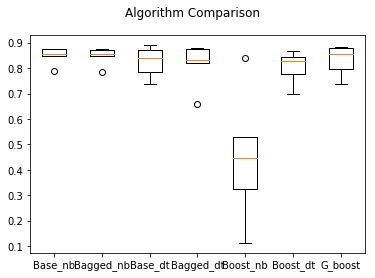

In [76]:
from sklearn.model_selection import KFold,cross_val_score
from sklearn import model_selection
results = []
names = []
for name, model in models2:
    kfold = model_selection.KFold(n_splits=5,random_state=2)
    cv_results = model_selection.cross_val_score(model, x, y, cv=kfold,scoring='recall')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.var())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [77]:
from sklearn.model_selection import KFold,cross_val_score
from sklearn import model_selection
from sklearn.metrics import roc_curve,auc
kf=KFold(n_splits=5,shuffle=True,random_state=2)
for name, model in models2:
    roc_auc=[]
    for train,test in kf.split(x,y):
        xtrain,xtest=x.iloc[train,:],x.iloc[test,:]
        ytrain,ytest=y[train],y[test]
        model.fit(xtrain,ytrain)
        y_predict=model.predict(xtest)
        cm=confusion_matrix(ytest,y_predict)
        fpr,tpr,_=roc_curve(ytest,y_predict)
        roc_auc.append(auc(fpr,tpr))
    print('AUC scores : %0.02f (+/- %0.5f) [%s]'%(np.mean(roc_auc),np.var(roc_auc,ddof=1),name))

AUC scores : 0.90 (+/- 0.00006) [Base_nb]
AUC scores : 0.90 (+/- 0.00007) [Bagged_nb]
AUC scores : 0.91 (+/- 0.00008) [Base_dt]
AUC scores : 0.91 (+/- 0.00008) [Bagged_dt]
AUC scores : 0.59 (+/- 0.00914) [Boost_nb]
AUC scores : 0.91 (+/- 0.00010) [Boost_dt]
AUC scores : 0.92 (+/- 0.00007) [G_boost]


### Out of all we can find Base Naive bayes is giving good results with better and consistent e-z trade off and better AUC for ROC so we can go with NB for final model building

# Final Model Naive Bayes

In [78]:
df=pd.read_csv('C:\\Users\\R Sriaravindh\\Documents\\Pulsar.csv')
x=df.drop('class',axis=1)
y=df['class']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=0)

In [79]:
nb=GaussianNB()
train_time_start=time.clock()
model_nb=nb.fit(xtrain,ytrain)
train_time_elapsed = (time.clock() - train_time_start)
test_time_start=time.clock()
y_pred_nb=model_nb.predict(xtest)
test_time_elapsed = (time.clock() - test_time_start)
print ('Accuracy score for Naive Bayes model', accuracy_score(ytest,y_pred_nb)*100)
cm_nb=confusion_matrix(ytest,y_pred_nb)

Accuracy score for Naive Bayes model 95.06145251396649


In [80]:
print('Train time for final model:',train_time_elapsed)
print('Test time for final model: ',test_time_elapsed)

Train time for final model: 0.003787499999816646
Test time for final model:  0.0009946000000127242


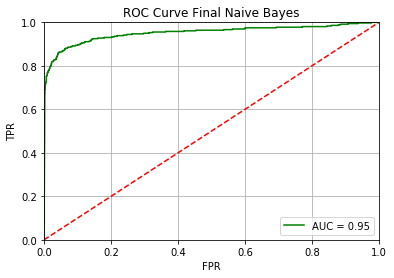

In [81]:
y_scores=nb.predict_proba(xtest)
fpr, tpr, threshold = roc_curve(ytest, y_scores[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, 'g', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.title('ROC Curve Final Naive Bayes')
plt.grid()
plt.show()

In [90]:
confusion_matrix(ytest,y_pred_nb)

array([[3946,  169],
       [  52,  308]], dtype=int64)

In [83]:
results_df.index=np.arange(results_df.shape[1])
results_df

,Algorithm,Train_time,Test_time,TP,FP,FN,TN,Accuracy_initial
0,Logistic_regression,0.078076,0.001717,16173,86,289,1350,97.904794
1,KNN,0.016884,0.172204,16259,0,0,1639,100.000000
2,Naive_bayes,0.007273,0.004705,15528,731,249,1390,94.524528
3,Decision_tree,0.126298,0.001854,16192,67,254,1385,98.206504
4,Random_forest,0.412672,0.031005,16192,67,254,1385,99.793273
5,Bagged_NB,0.022475,0.020942,15522,737,251,1388,94.479830
6,Bagged_LR,1.112256,0.012086,16171,88,288,1351,97.899207
7,Bagged_DT,0.082798,0.003647,16162,97,237,1402,98.133870
